In [1]:
#classification problem using ann


In [2]:
import keras
keras.__version__

'2.8.0'

In [3]:
import numpy as np
import pandas as pd
import keras
import matplotlib as plt


In [4]:
dataset=pd.read_csv("Churn_Modelling.csv")
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
X_dataset=dataset.iloc[: ,3:13]
X_dataset.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [6]:
Y_dataset=dataset.iloc[:,13]
Y_dataset.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [7]:
Converted_Geography=pd.get_dummies(X_dataset["Geography"],drop_first=True)
Converted_Gender=pd.get_dummies(X_dataset["Gender"],drop_first=True)

In [8]:
X_NonCategorical=pd.concat([X_dataset,Converted_Gender,Converted_Geography],axis=1)

In [9]:
X_NonCategorical.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Male,Germany,Spain
0,619,France,Female,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,1


In [10]:
X_Newdataset=X_NonCategorical.drop(["Gender","Geography"],axis=1)

In [11]:
X_Newdataset.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Male,Germany,Spain
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1


In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X_Newdataset,Y_dataset,test_size=0.2,random_state=0)

In [14]:
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
from keras_tuner.tuners import RandomSearch

In [18]:
import keras_tuner as kt

In [42]:
def build_model(hp):
    model = keras.Sequential()
    for i in range(hp.Int('num_layers', 2, 20)):
        model.add(layers.Dense(units=hp.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=512,
                                            step=32),
                               activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))   
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='categorical_crossentropy',
        metrics=['accuracy'])
    return model

In [43]:
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=3,
    directory='Deep Learning1',
    project_name='Churn_Modelling')

In [44]:
tuner.search_space_summary()

Search space summary
Default search space size: 4
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 20, 'step': 1, 'sampling': None}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [45]:
tuner.search(X_train, Y_train,
             epochs=5,
             validation_data=(X_test, Y_test))

Trial 5 Complete [00h 00m 59s]
val_accuracy: 0.7975000143051147

Best val_accuracy So Far: 0.7975000143051147
Total elapsed time: 00h 04m 53s
INFO:tensorflow:Oracle triggered exit


In [46]:
tuner.results_summary()

Results summary
Results in Deep Learning1\Churn_Modelling
Showing 10 best trials
Objective(name='val_accuracy', direction='max')
Trial summary
Hyperparameters:
num_layers: 8
units_0: 128
units_1: 320
learning_rate: 0.0001
units_2: 32
units_3: 32
units_4: 32
units_5: 32
units_6: 32
units_7: 32
Score: 0.7975000143051147
Trial summary
Hyperparameters:
num_layers: 8
units_0: 256
units_1: 352
learning_rate: 0.01
units_2: 128
units_3: 160
units_4: 416
units_5: 32
units_6: 288
units_7: 64
Score: 0.7975000143051147
Trial summary
Hyperparameters:
num_layers: 16
units_0: 32
units_1: 288
learning_rate: 0.001
units_2: 320
units_3: 352
units_4: 448
units_5: 64
units_6: 224
units_7: 128
units_8: 32
units_9: 32
units_10: 32
units_11: 32
units_12: 32
units_13: 32
units_14: 32
units_15: 32
Score: 0.7975000143051147
Trial summary
Hyperparameters:
num_layers: 7
units_0: 512
units_1: 512
learning_rate: 0.0001
units_2: 256
units_3: 96
units_4: 480
units_5: 352
units_6: 352
units_7: 32
units_8: 224
units_9:

In [19]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [20]:
#ANN

In [21]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

import matplotlib.pyplot as plt

In [22]:
# Initialising the ANN
classifier = Sequential()


In [23]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units= 6, kernel_initializer= 'he_uniform',activation='relu',input_dim = 11))


In [24]:
# Adding the second hidden layer
classifier.add(Dense(units= 6, kernel_initializer= 'he_uniform',activation='relu'))

In [25]:
# Adding the output layer
classifier.add(Dense(units=  1, kernel_initializer= 'glorot_uniform', activation = 'sigmoid'))

In [26]:
# Compiling the ANN
classifier.compile(optimizer = 'Adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [29]:
# Fitting the ANN to the Training set
model_history=classifier.fit(X_train, Y_train,validation_split=0.33, batch_size = 10, epochs = 100)


Epoch 1/100
536/536 [==============================] - 4s 5ms/step - loss: 0.5357 - accuracy: 0.7841 - val_loss: 0.5156 - val_accuracy: 0.7952
Epoch 2/100
536/536 [==============================] - 2s 3ms/step - loss: 0.5024 - accuracy: 0.7962 - val_loss: 0.4953 - val_accuracy: 0.7955
Epoch 3/100
536/536 [==============================] - 2s 3ms/step - loss: 0.4877 - accuracy: 0.7962 - val_loss: 0.4834 - val_accuracy: 0.7955
Epoch 4/100
536/536 [==============================] - 2s 4ms/step - loss: 0.4777 - accuracy: 0.7962 - val_loss: 0.4746 - val_accuracy: 0.7955
Epoch 5/100
536/536 [==============================] - 2s 4ms/step - loss: 0.4696 - accuracy: 0.7962 - val_loss: 0.4677 - val_accuracy: 0.7955
Epoch 6/100
536/536 [==============================] - 2s 4ms/step - loss: 0.4634 - accuracy: 0.7962 - val_loss: 0.4624 - val_accuracy: 0.7955
Epoch 7/100
536/536 [==============================] - 2s 4ms/step - loss: 0.4579 - accuracy: 0.7962 - val_loss: 0.4576 - val_accuracy: 0.7955

Epoch 58/100
536/536 [==============================] - 2s 4ms/step - loss: 0.3548 - accuracy: 0.8537 - val_loss: 0.3842 - val_accuracy: 0.8364
Epoch 59/100
536/536 [==============================] - 2s 4ms/step - loss: 0.3539 - accuracy: 0.8545 - val_loss: 0.3835 - val_accuracy: 0.8364
Epoch 60/100
536/536 [==============================] - 2s 4ms/step - loss: 0.3530 - accuracy: 0.8539 - val_loss: 0.3828 - val_accuracy: 0.8368
Epoch 61/100
536/536 [==============================] - 2s 4ms/step - loss: 0.3520 - accuracy: 0.8550 - val_loss: 0.3820 - val_accuracy: 0.8372
Epoch 62/100
536/536 [==============================] - 2s 4ms/step - loss: 0.3513 - accuracy: 0.8556 - val_loss: 0.3815 - val_accuracy: 0.8357
Epoch 63/100
536/536 [==============================] - 2s 4ms/step - loss: 0.3505 - accuracy: 0.8552 - val_loss: 0.3808 - val_accuracy: 0.8360
Epoch 64/100
536/536 [==============================] - 2s 4ms/step - loss: 0.3498 - accuracy: 0.8565 - val_loss: 0.3803 - val_accuracy:

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


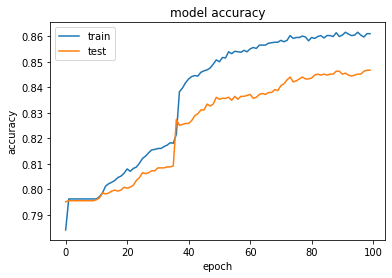

In [32]:
# list all data in history

print(model_history.history.keys())
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


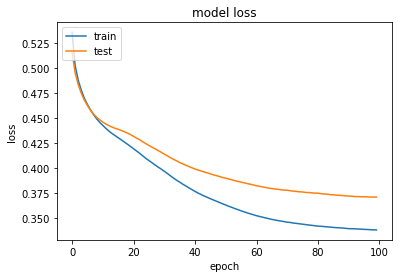

In [33]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#  Making the predictions and evaluating the model

In [34]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)


In [40]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred)
cm

array([[1524,   71],
       [ 217,  188]], dtype=int64)

In [41]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,Y_test)
score

0.856

In [39]:
# for adding DROPOUT use 
#classifier.add(Dropout(0.4))
#(0<=dp<=1)